<a href="https://colab.research.google.com/github/geocarvalho/python-ds/blob/master/applied-data-science-with-python/applied_ml_in_python/week4_applied_ml_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# https://stackoverflow.com/questions/50665594/i-am-unable-to-install-adspy-shared-utilities-in-anaconda-using-the-command-cond
# adspy_shared_utilities

import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches

def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized
    uri = "https://raw.githubusercontent.com/Starignus/AppliedML_Python_Coursera/master/CommViolPredUnnormalizedData.txt"
    crime = pd.read_table(uri, sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
    crime = crime.iloc[:,columns_to_keep].dropna()

    X_crime = crime.iloc[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)

def plot_decision_tree(clf, feature_names, class_names):
    # This function requires the pydotplus module and assumes it's been installed.
    # In some cases (typically under Windows) even after running conda install, there is a problem where the
    # pydotplus module is not found when running from within the notebook environment.  The following code
    # may help to guarantee the module is installed in the current notebook environment directory.
    #
    # import sys; sys.executable
    # !{sys.executable} -m pip install pydotplus

    export_graphviz(clf, out_file="adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    with open("adspy_temp.dot") as f:
        dot_graph = f.read()
    # Alternate method using pydotplus, if installed.
    # graph = pydotplus.graphviz.graph_from_dot_data(dot_graph)
    # return graph.create_png()
    return graphviz.Source(dot_graph)

def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(numpy.arange(c_features), feature_names)

def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(numpy.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()


def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])


    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')

    plt.show()

def plot_two_class_knn(X, y, n_neighbors, weights, X_test, y_test):
    X_mat = X
    y_mat = y

    # Create color maps
    cmap_light = ListedColormap(['#FFFFAA', '#AAFFAA', '#AAAAFF','#EFEFEF'])
    cmap_bold  = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    title = "Neighbors = {}".format(n_neighbors)
    if (X_test is not None):
        train_score = clf.score(X_mat, y_mat)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    patch0 = mpatches.Patch(color='#FFFF00', label='class 0')
    patch1 = mpatches.Patch(color='#000000', label='class 1')
    plt.legend(handles=[patch0, patch1])

    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title(title)

    plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


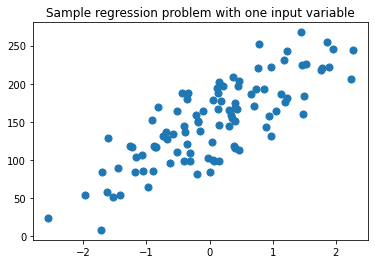

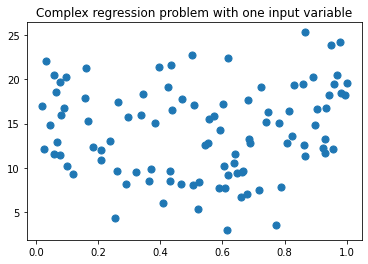

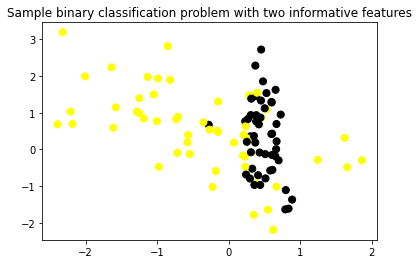

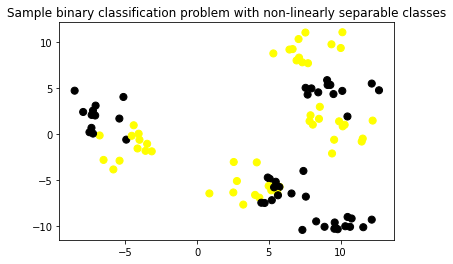

In [5]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

# Applied ML in Python

## Week 4 - Supervised ML - part 2

### Naive bayes classifier

* Are based on simple probabilistic models of how the data in each class might have been generated;

* Are call "Naive" because they make the simplifying assumption that each feature of an instance is independent of all the others, given the class;

#### A simple, probabilistic classifier family

* They assume that, for all instances of a given class, the features have little/no correlation with eacho other;

* Highly efficient learning and prediction;

* But generalization performance may worse than more sophisticated learning methods;

* Can be competitive for some tasks;

* The decision boundary is a parabolic.

#### Types

* **Bernoulli**: binary features (e.g. word presence/absence);
* **Multinomial**: discrete features (e.g. word counts);
* **Gaussian**: continuous/real-valued features;
 - Statistics computed for each class: for each feature is mean and standard deviation;

* See the applied text mining course for more details on the Bernoulli and multinomial naive bayes models;




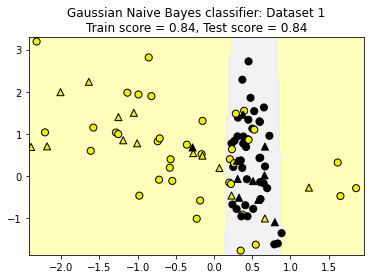

In [6]:
# Naive bayes classifiers
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                  "Gaussian Naive Bayes classifier: Dataset 1")

* Naive Bayes models are among a few classifiers in scikit learn that support a method called partial fit, which can be used instead of fit to train the classifier incrementally in case you're working with a huge dataset that doesn't fit into memory;

* For th Gaussian NB class there are no special parameters to control the models complexity;

In [7]:
# Application to a real-world dataset
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
print("Breast cancer dataset")
print("Accuracy of GaussianNB classifier on training set: {:.2f}".format(
    nbclf.score(X_train, y_train)
))
print("Accuracy of GaussianNB classifier on test set: {:.2f}".format(
    nbclf.score(X_test, y_test)
))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


* Gaussian NB is used to high-dimensional data. When each data instance has hundreds, thousands or maybe even more features;

* And likewise the Bernoulli and Multinomial options of NB are used for text classification where there are very large number of distinct words is features and where the feature vectors are sparse because any given document uses only a small fraction of the overall vocabulary;

* It can be shown that NB classifiers are related mathematically to linear models, so many of the pros and cons of linear models also apply to NB;

#### Pros and Cons

* **Pros**:
 - Easy to understand;
 - Simple, efficient parameter estimation;
 - Works well with high-dimensional data;
 - Often useful as a baseline comparison against more sophisticated methods.

* **Cons**:
 - Assumption that features are conditionally independent given the class is not realistic;
 - As a result, other classifier types often have better generaliztion performance;
 - Their confidence estimates for predictions are not very accurate.

---

### Random forests

* Ensembles takes multiple individual learning models and combines them to produce an aggregate model that is more powerful than any of its individual learning models alone;

* They are effective because if we have different learning models, although each of them might perform well individually, they'll tend to make different kinds of mistakes on the dataset;
> Each individual model might overfit to a different part of the data.

* By combining different individual models into an ensemble, we can average out their individual mistakes to reduce the risk of overfitting while maintaining strong prediction performance;

* Random forests are an ensemble of trees, not just one tree;

* `sklearn.ensemble` module has `RandomForestClassifier` for classification and `RandomForestRegressor` for regression;

* One decision tree: tend to be prone to overfitting the training data. Many decision trees: more stable and better generalization;
> Can be different in some way (random variation) from the other trees in the forest.

* Ensemble of trees should be diverse: introduce random variation into tree-building;

#### Random forest process

* The data used to build each tree is selected randomly and the features chosen in each split tests are also randomly selected;

* To create a model you first decide on how many trees to build, set using the `n_estimated` parameter;

* Each tree will be created by a different random sample of the data called the bootstrap sample;
>  If your training set has **n** instances or samples in total, a bootstrap sample of size **n** is created by just repeatedly picking one of the **n** dataset rows at random with replacement, allowing for the possibility of picking the same row again at each selection. This selection process is repeated **n** times, the resulting bootstrap sample has **n** rows just like the original training set but with possibly some roes from the original dataset missing and others occurring multiple times just due to the nature of the random selection with replacement.

* When picking the best split for a node, instead of finding the best split across all possible features, a random subset of features is chosen and the best split is found within that smaller subset of features;
> The number of features in the subset that are randomly considered at each stage is controlled by the `max_features` parameter.

#### The `max_features` parameter

* The learning process is quite sensitive to `max_features`;

* Setting `max_features = 1` leads to forest with diverse, more complex trees;
> The RF is limited to performing a split on the single feature that was selected randomly instead of being able to take the best split over several variables.

* Setting `max_features = <close to number of features>` will lead to similar forests with simpler trees;
> The trees will tend to be similar and probably will require fewer levels to fit the data using the most informative features.

#### Prediction with RF

1. Make prediction for every tree in the forest;
2. Combine individual predictions;
 - *Regression*: **mean** of individual tree predictions;
 - *Classification*: the overall prediction is based on a **weighted vote**. Each tree gives a probability for each possible target class label then the probabilities for each class are averaged across al the trees and the class with the highest probability is the final predicted class.
 





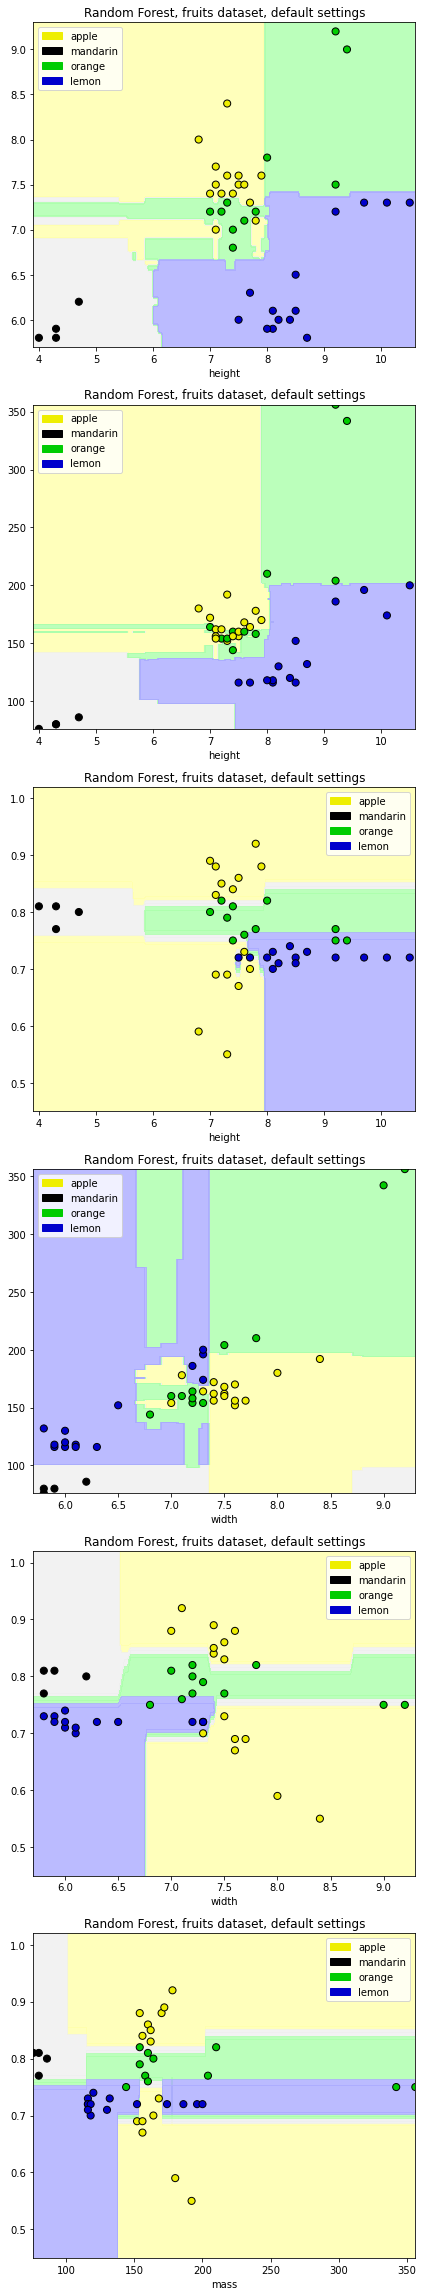

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [8]:
# Random forest: fruit dataset
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_fruits.to_numpy(),
                                                    y_fruits.to_numpy(),
                                                    random_state=0)

fig, subaxes = plt.subplots(6, 1, figsize=(6,32))

title = "Random Forest, fruits dataset, default settings"
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
  X = X_train[:, pair]
  y = y_train

  clf = RandomForestClassifier().fit(X, y)
  plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                            None, title, axis,
                                            target_names_fruits)
  axis.set_xlabel(feature_names_fruits[pair[0]])
  axis.set_ylabel
  (feature_names_fruits[pair[1]])

plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators=10,
                             random_state=0).fit(X_train, y_train)

print("Random Forest, Fruit dataset, default settings")
print("Accuracy of RF classifier on training set: {:.2f}".format(
    clf.score(X_train, y_train)))
print("Accuracy of RF classifier on test set: {:.2f}".format(
    clf.score(X_test, y_test)))


In [9]:
# Random forest on real-world dataset
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                    random_state=0)
clf = RandomForestClassifier(max_features=8, random_state=0)
clf.fit(X_train, y_train)

print("Breast cancer dataset")
print("Accuracy of RF classifier on training set: {:.2f}".format(
    clf.score(X_train, y_train)))
print("Accuracy of RF classifier on test set: {:.2f}".format(
    clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.97


* We don't need to perform scaling or other pre-processing as we did with a number of other supervised learning methods;

* Note that we passed in a fixed value for the random state parameter in order to make the results reproducible. Without that, the model would likely be different each time due to the randomized nature of the RF algorithm;

#### Pros and Cons

* **Pros**:
 - Doesn't require careful normalization of features or extensive parameter tuning;
 - Like decision trees, handles a mixture of feature types;
 - Easily parallelized across multiple CPUs.

* **Cons**:
 - The resulting models are often difficult for humans to interpret;
 - Like decision trees, random forests may not be a good choice for very high-dimensional tasks (e.g. text classifier) compared to fast, accurate linear models.

#### Key parameters for RandomForestClassifier

* `n_estimators`: number of trees to use in ensemble (default: 10);
> SHould be larger for larger dataset to reduce overfitting (but uses more computation);

* `max_features`: has a strong effectt on perfomance. Influences the diversity of trees in the forest;
> Default works well in practice, but adjusting may lead to some further gains.

* `max_depth`: controls the depth of each tree (default: None. Splits until all leaves are pure);
> The nodes in a tree will continue to be split until all leaves contain the same class or have fewer samples than the minimum sample split parameter value, which is two by default.

* `n_jobs`: How many cores to use in parallel during training;
> If you have four cores the training will be four times as fast as if you just used one. If you set to negative one it will use all the cores on your system and setting more than you have it won't have any additional effect.

* Choose a fixed setting for the `random_state` parameter if you need reproducible results.

---

### Gradient boosted decition trees (GBDT)

* Is another multiple tree based ensemble method to create models for classification and regression;

* They build a series of trees, where each tree is trained, so that it attempts to correct the mistakes of the previous tree in the series;

* Each GBDT use lots of shallow trees known as **weak learners**, built in a nonrandom way to create a model that makes fewer mistakes as more trees are added;

* The number of estimators in the GBDT is an important parameter in controlling model complexity;

* The learning rate controls how hard each new tree tries to correct remaining mistakes from previous round;
 - High learning rate: **more complex trees** because each sucessive tree put strong emphases on correcting the mistakes of its predecessor;
 - Low learning rate: simpler trees;






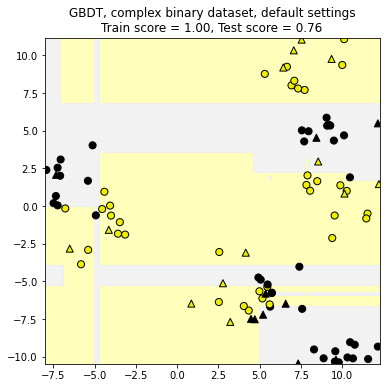

In [10]:
# GBDT
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(1, 1, figsize=(6,6))

clf = GradientBoostingClassifier().fit(X_train, y_train)
title = "GBDT, complex binary dataset, default settings"
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                          y_test, title, subaxes)
plt.show()

* By default:
 - `learning_rate = 0.1`;
 - `n_estimators = 100`;
 - `max_depth = 3`

In [11]:
# GBDT on a real-world dataset
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                    random_state=0)

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

print("Breast cancer dataset (learning_rate=0.1, max_depth=3)")
print("Accuracy of GBDT classifier on training set: {:.2f}".format(
    clf.score(X_train, y_train)))
print("Accuracy of GBDT classifier on test set: {:.2f}\n".format(
    clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

print("Breast cancer dataset (learning_rate=0.01, max_depth=2)")
print("Accuracy of GBDT classifier on training set: {:.2f}".format(
    clf.score(X_train, y_train)))
print("Accuracy of GBDT classifier on test set: {:.2f}".format(
    clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.97

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


#### GBDT: Pros and Cons

* **Pros**:
 - Often best off-the-shelf accuracy on many problems;
 - Using model for prediction requires only modest memory and is fast;
 - Doesn't require careful normalization of features to perform well;
 - Like decision trees, handles a mixture of feature types.

* **Cons**:
 - Like RF, the models are often difficult for humans to interpret;
 - Requires careful tuning of the learning rate and other parameters;
 - Training can require sgnificant computation;
 - Like Decision Trees, not recommended for text classification and other problems with very high dimensional sparse features, for accuracy and computational cost reasos.

#### GBDT: Key parameters

* `n_estimators: set # of small decistion trees to use (weak learners) in the ensemble;
> Is adjusted first, to best exploit memory and CPUs during training the other parameters.

* `learning_rate`: controls emphasis on fixing errors from previous iteration;
> Is typically tuned with `n_estimators`, since making learning rates smaller will require more trees to maintain model complexity. Increasing the parameter can lead to overfitting.

* `max_depth` is typically set to a small value (e.g. 3-5) for most applications.
> Can have an effect on model complexity of individual trees.

---

### Neural Networks (NN)

#### Multi-layer perceptron (MLP) with one hidden layer (and tanh activation function)

* Also know as feed-foward neural networks;

* MLPs take this idea of computing weighted sums of the input features, like in logistic regression. But it takes it a step beyond by adding an additional processing step (**hidden layer**).
> In the hidden layer you have the hidden units that computes a non-linear function of the weighted sums of the input features that result in intermediate outpu values.

Input features for hidden layer:
$h_i = tanh(w_{0i}x_0 + w_{1i}x_1 + w_{2i}x_2 + w_{3i}x_3)$

Hidden layer output
$\hat{y} = v_0h_0 + v_1h_1 + v_2h_2$

* The $tanh()$ is an activation function, in the example is the *hyperbolic tangent function*, which is related to the logistic function.

* Prediction $\hat{y}$ involves computing a different initial weighted sum of the input values for each hidden unit, which applies a nonlinear activation function, and then all of these nonlinear outputs are combined using another weighted sum.

* There are a number of choices for the activation function in a NN that gets applied in hidden units;
 - *Hyperbolic tangent* (**tanh** is as-shaped function) - it maps large positive input values to outputs very close to one and large negative input values to outputs close to negative one;
 - *Rectified linear unit function* (**relu**) - is the default in sklearn, it maps any negative input values to zero;
 - *Logistic function*.
 > These differences in the activation function can have some effect on the shape of regression prediction plots or classification decision boundaries.

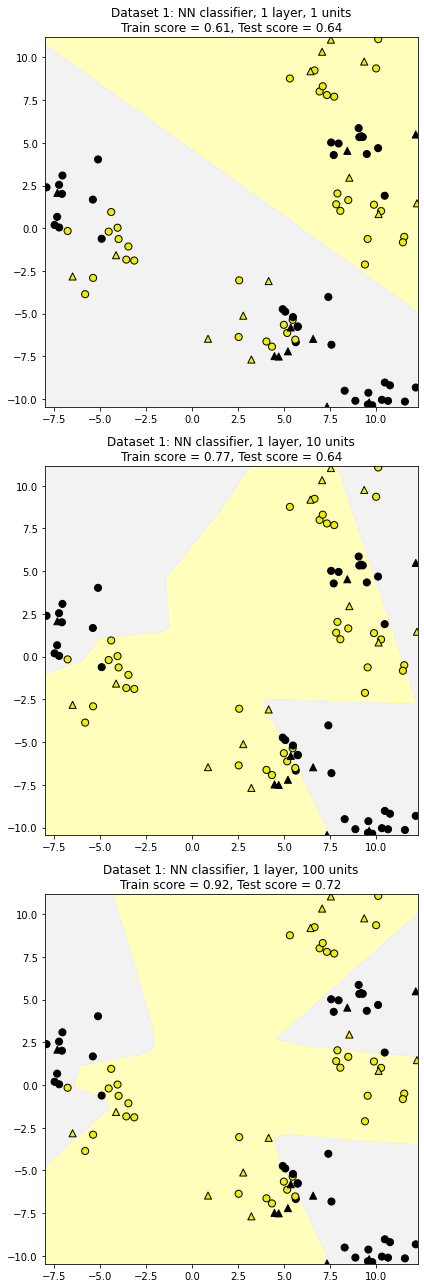

In [12]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                    random_state=0)
fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for units, axis in zip([1, 10, 100], subaxes):
  nnclf = MLPClassifier(hidden_layer_sizes = [units], solver="lbfgs",
                        random_state=0).fit(X_train, y_train)

  title = "Dataset 1: NN classifier, 1 layer, {} units".format(units)
  plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                            X_test, y_test, title, axis)
  plt.tight_layout()

* By default, if you don't specify the `hidden_layer_sizes` parameter, scikit-learn will create a single hidden layer with 100 hidden units;

* It's possible to create an MLP with more than one hidden layer by passing a `hidden_layer_sizes` parameter with multiple entries;

* The parameter `solver` specifies the algorithm to use for learning the weights of the network;

* We passed the `random_state=0` because for NN their weights are initialized randomly, which can affect the model that is learned. So even without changing the key parameters on the same dataset, the same neural network algorithm might learn two different models depending on the value of the internal random seed that is chosen. So by always setting the same value for random seed used to initialize the weights, we can assure the result will always be the same, for everyone using these examples;

#### MLP with two hidden layers

* Adding the second hidden layer further increases the complexity of functions that the NN can learn, from more complex datasets;

* Taking this complexity furthe, large architectures of NN, with many stages of computation, are why deep learning methods are called deep;




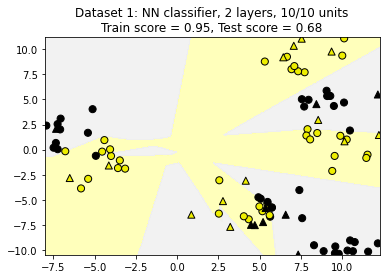

In [13]:
nnclf = MLPClassifier(hidden_layer_sizes=[10, 10], solver="lbfgs",
                      random_state=0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                  "Dataset 1: NN classifier, 2 layers, 10/10 units")

* With more hidden layers with lots of hidden units, the number of weights or model coefficients to estimate for a NN can increase rapidly;
> Complex NN could have thousands of weights to estimate.

* This model complexity can be controlled with ridge and lasso regression by adding an L2 regularization penalty on the weights;
> L2 regularization penalizes models that have a large sum of squares of all the weight values. With the effecat that NN prefers models with more weights shrunk close to zero.
 - The regularization parameter for MLPs is called **alpha**.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

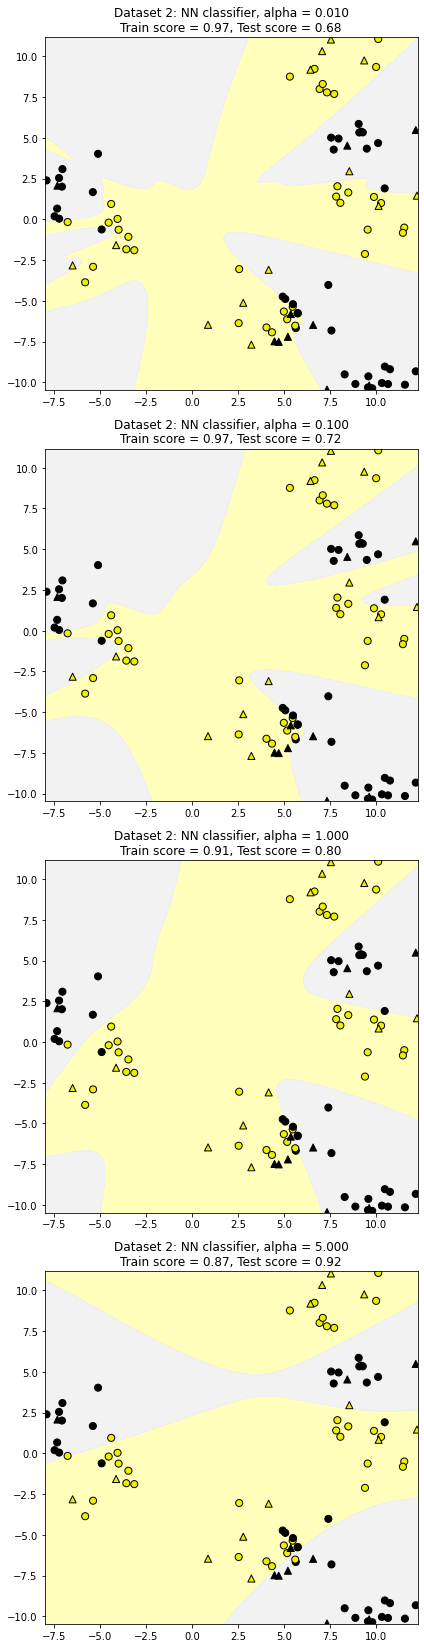

In [14]:
fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
  nnclf = MLPClassifier(solver="lbfgs", activation="tanh",
                        alpha=this_alpha, hidden_layer_sizes=[100, 100],
                        random_state=0).fit(X_train, y_train)

  title = "Dataset 2: NN classifier, alpha = {:.3f}".format(this_alpha)
  plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                            X_test, y_test, title, axis)
  plt.tight_layout()
  

* With a small `alpha` the decision boundaries are much more complex and variable and the classifier is overfitting (high training set score and low test score);

* With a larger value of `alpha` results in a much smoother decision boundaries while still capturing the global structure of the data. And this increased simplicity allows it to generalize much better and not overfit the training set (higher test score);

* The feature normalization for NN can be critical.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                    random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=[100, 100], alpha=5.0,
                    random_state=0, solver="lbfgs").fit(X_train_scaled, y_train)

print("Breast cancer dataset")
print("Accuracy of NN classifier on training set: {:.2f}".format(
    clf.score(X_train_scaled, y_train)))
print("Accuracy of NN classifier on test set: {:.2f}".format(
    clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.98
Accuracy of NN classifier on test set: 0.90


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

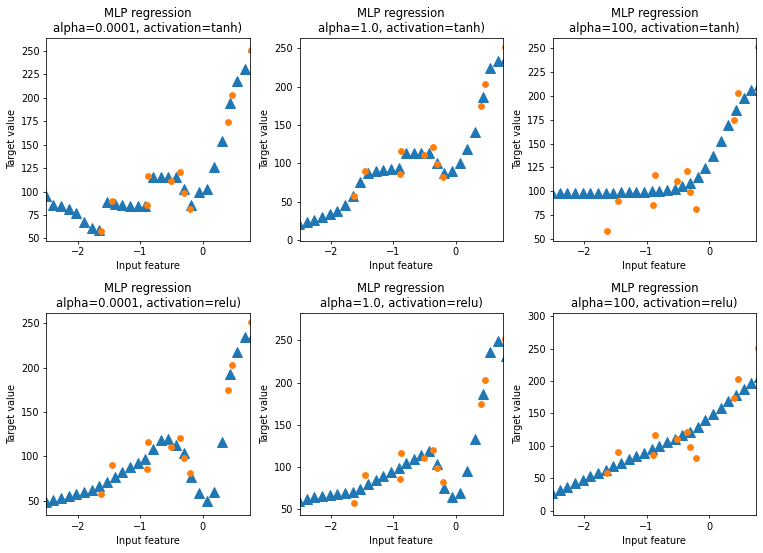

In [16]:
from sklearn.neural_network import MLPRegressor

fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

* The effect of increasing the amount of L2 regularization bu incresing alpha is to constrain the regression to use simpler models with fewer large weights;

#### NN: Pros and Cons

* **Pros**:
 - They form the basis of state-of-the-art models and can be formed into advanced architectures that effectively capture complex features given enough data and computation.

* **Cons**:
 - Larger, more complex models require significant training time, data and customization;
 - Careful preprocessing of the data is needed;
 - A good choice when the features are of similar types, but less so when features of very different types.

#### NN: Important parameters

* `hidden_layer_sizes`: sets the number of hidden layers (number of elements in list), and number of hidden units per layer (each list element);
> Default is 100.

* `alpha`: controls weight on the regularization penalty that shrinks weights to zero;
> Default is 0.0001.

* `activation`: controls the nonlinear function used for the activation function including `relu` (default), `logistic` and `tanh`;

* `solver`: specify the algorithm that learns the network weights. It actually does the numerical work of finding the optimal weights.
 - An intuitive way of visualizing this process is that all of the solver algorithms have to do a kind of *hill-climbing* in a very bumpy landscape with lots of local minima. Where each local minima corresponds to a locally optimal set of weights. That is a choice of weight setting that's better than any nearby choices of weights. Across this whole landscape of very bumpy local minima, some will have higher validation scores on the test data and some will have lower. Depending on the initial random initialization of the weights and the nature of the trajectory in the search path that the solver takes through this bumpy landscape, the solver can end up at a different local minima which can have different validation scores;
 - The default solver `adam` tends to be both efficient and effective on large datasets with thousands of training examples. For small datasets, the `lbfgs` solver tends to be faster and find more effective weights.

---

### Neural Networks Made Easy (optional)

This tutorial by Ophir Tanz and Cambron Carter is a fun high-level math-free tutorial on neural networks and in particular, goes into more depth on convolutional neural networks - a form of neural network with multiple layers of processing that forms the basis for many deep learning systems today (see the Deep Learning lecture for more details).

Carter, C., & Tanz, O. (2017, April 13). Neural networks made easy. Retrieved May 10, 2017, from https://techcrunch.com/2017/04/13/neural-networks-made-easy/

---

### Play with Neural Networks: TensorFlow Playground (optional)

This neural network simulation by Daniel Smilkov and Shan Carter lets you play with neural networks in your browser. See the effect of different parameter settings and network configurations on a choice of difficult example classification problems.

The "output" on the right shows the "training loss" and "test loss". Loss is an evaluation metric that is related to the number of errors made for each example on the training or test set - so lower loss numbers are better. (In technical terms, for neural networks the loss is usually negative log-likelihood for classification, and residual sum of squares for regression.)

To show decision boundaries more clearly, along with the test data, click the two checkboxes marked "Show test data" and "Discretize output" in the lower right of the window.

To access the simulation, click here:

http://playground.tensorflow.org/

---

### Deep learning (Optional)

* It architectures combine a sophisticated automatic feature extraction phase with a supervised learning phase;

* The feature extraction phase uses a hierarchy of multiple feature extraction layers;

* Starting from primitive, low-level features in the initial layer, each feature layer's output provides the input freatures to the next higher feature layer;

* All features are used in the final supervised learning model;

#### An example of a simple deep learning architecture

* In a example of digit recognition classification:
 - The automatic feature extraction step made up of hierarchy of feature layers. Each of which is based on a network that does convolution which can be thought as a filter for a specific pattern followed by a subsampling step, also know as pooling that can detect a translated or rotated version of that feature anywhere in the image;
 - So that feature are detected properly for the final classification step, which is implemented as a fully connected network;
 - The subsampling step also has the effect of reducing the computational complexity, depending on the properties of the object we want to predict, for example if we care only about the presence of the object in the image compared to a specific location, the subsampling part of the architecture may or may not be included.

#### First, second and third feature layer bases learned for faces

* The first layer of their deep learning architecture extracts the most primitive low-level features, such as edges and different kinds of blobs;

* The second layer creates new features from combinations of those firest layer features. For faces, this might correspond to key elements that capture shapes of higher level features like noses or eyes;

* The third layer in turn, creates new features from combinations of the second layer of features. Forming still higher level features that capture typical face types and facial expressions;

* Finally, all of these features are used as the input to the final supervised learning step, named the face classifier;

* Adcances in both algorithms and computing power allow current deep learning systems to train architectures that could have dozens of layers of nonlinear, hierarchical features.

#### Pros and Cons

* **Pros**:
 - Powerful: deep learning has achieved significant gains over other ML approaches on many difficult learning tasks, leading to state-of-the-art performance across many different domains;
 - Does effective automatic feature extraction, reducing the need for guesswork and heuristic on this key problem;
 - Current software provides flexible architectures that can be adapted for new domains fairly easily.

* **Cons**:
 - Can require huge amounts of training data and computing power;
 - Architectures can be complex and often must be highly tailored to a specific application;
 - The resulting models may not be easily interpretable.

#### Deep learning software for Python

* Keras https://keras.io/
* Lasagne https://lasagne.readthedocs.io/en/latest/
* TensorFlow https://www.tensorflow.org/
* Theano http://deeplearning.net/software/theano/
* Libraries support high-performance computation via GPUs.

---

### Deep Learning in a Nutshell: Core Concepts (optional)

This self-contained tutorial by Tim Dettmers covers the key high-level concepts of deep learning and reinforces the basic concepts we covered in the Neural Networks and Deep Learning lectures. There are multiple parts - Part 1 is less technical while Parts 2-4 go into more detail on algorithms.

The link to access Part 1 is here:

https://devblogs.nvidia.com/parallelforall/deep-learning-nutshell-core-concepts/

Deep Learning in a Nutshell: Core Concepts. (2016, September 08). Retrieved May 10, 2017.

---

### Assisting Pathologists in Detecting Cancer with Deep Learning (optional)

This short article is an example of how deep learning is being used in healthcare.

[Assisting Pathologists in Detecting Cancer with Deep Learning](https://ai.googleblog.com/2017/03/assisting-pathologists-in-detecting.html)

Posted by Martin Stumpe (Technical Lead) and Lily Peng (Product Manager), Google Research Blog

---

### Data leakage

* When the data used to train a machine learning algorithm happens to include unexpected extra information about the very thing you're trying to predict;

* Introducing information about the target during training that would not legitimately be available during actual use;

* Obvious examples:
 - Including the label to be predicted as a feature;
 - Including test data with training data.

* If your model performane is too good (optimistic) to be true, it probably is and likely due to "giveaway" features.

#### Detecting data leakage

* Before building the model:
 - Exploratory data analysis to find surprises in the data;
 - Are there features very highly correlated with the target value?

* After building the model:
 - Look for surprising feature behavior in the fitted model;
 - Are there features with very high weights or high information gain?
 - Simple rule-based models like decision trees can help with features like account numbers, patient IDS;
 - Is overall model performance surprisingly good compared to known results on the same dataset or for similar problems on similar datasets?

* Limited real-world deployment of the trained model
 - Potentially expensive in terms of development time, but more realistic;
 - Is the trained model generalizing well to new data?
 > May not give much immediate insight into if or where the leakage is happening or if any drop in performance is due to other reasons like classical over fitting.

#### Minimizing data leakage

* Perform data preparation within each cross-validation fold separately
 - Scale/normalize data, perform feature selection, etc. Within each fold separately, not using the entire dataset;
 - For any such parameters estimated on the training data, you must use those same parameters to prepare data on the corresponding held-out test fold.

* With time series data, use a timestamp cutoff
 - The cutoff value is set to the specific time point where prediction is to occur using current and past records;
  - Using a cutoff time will make sure you aren't acessing any data records that were gathered after the prediction time, i.e. in the future.

* Before any work with a new dataset, split off a final test validation dataset
 - ... if you have enough data;
 - Use this test dataset as the very last step in you validation;
 - Helps to check the true generalization performance of any trained models.

---

### The Treachery of Leakage (optional)

This fun, less-technical read from Colin Fraser reinforces the material in the Data Leakage lecture to provide further explanation and examples on detecting and avoiding data leakage in your machine learning applications.

Here's the link to the article:

https://medium.com/@colin.fraser/the-treachery-of-leakage-56a2d7c4e931

---

### Leakage in Data Mining: Formulation, Detection, and Avoidance (optional)

If you want an example in more depth of how data scientists are exploring ways to detect and avoid data leakage, this technical article proposes one approach: a two-stage process based on "legitimacy tags".

If you're just interested in getting a little more background on the problem along with interesting examples, Sections 1 and 2 (Introduction and Related Work) are also useful to read on their own.

Kaufman, S., Rosset, S., & Perlich, C. (2011). [Leakage in data mining.](https://www.cs.umb.edu/~ding/history/470_670_fall_2011/papers/cs670_Tran_PreferredPaper_LeakingInDataMining.pdf) Proceedings of the 17th ACM SIGKDD international conference on Knowledge discovery and data mining - KDD '11. doi:10.1145/2020408.2020496

---

### Data Leakage Example: The ICML 2013 Whale Challenge (optional)

In 2013 a machine learning competition offered a prize for the most accurate detection of right whale calls based on audio data. The organizers soon discovered data leakage problems in the first release of the dataset, and this article explains what happened. It's a short but interesting article that serves as an excellent example of how subtle or not-so-subtle leakage can occur in specific features.

https://www.kaggle.com/c/the-icml-2013-whale-challenge-right-whale-redux/discussion/4865#25839#post25839

---

### Rules of Machine Learning: Best Practices for ML Engineering (optional)

This optional reading is intended mainly for software engineers who want to build and deploy machine learning applications in production - especially at scale. The only background knowledge required are the basic machine learning concepts we've covered so far in this course. Written by Google's Dr. Martin Zinkevich, it walks through a set of software engineering best practices for designing and deploying machine learning in software systems - based on years of practical experience at Google.

http://martin.zinkevich.org/rules_of_ml/rules_of_ml.pdf

---

### Module 4 Quiz

#### 1. hich of the following is an example of clustering? 

- Separate the data into distinct groups by similarity

#### 2. Which of the following are advantages to using decision trees over other models? (Select all that apply)

- Trees are easy to interpret and visualize;
- Trees often require less preprocessing of data.

#### 3. What is the main reason that each tree of a random forest only looks at a random subset of the features when building each node?

- To improve generalization by reducing correlation among the trees and making the model more robust to bias.

#### 4. Which of the following supervised machine learning methods are greatly affected by feature scaling? (Select all that apply)

- NN, SVM and KNN

#### 5. Select which of the following statements are true.

- For a model that won't overfit a training set, Naive Bayes would be a better choice than a decision tree;

- For predicting future sales of clothing line, linear regression would be a better choice than a decision tree regressor.

#### 6. Match each of the prediction probabilities decision boundaries visualized below with the model that created them.

- NN, KNN and decision tree

#### 7. A decision tree of depth 2 is visualized below. Using the `value` attribute of each leaf, find the accuracy score for the tree of depth 2 and the accuracy score for a tree of depth 1.

- 0.06745

#### 8. For the autograded assignment in this module, you will create a classifier to predict whether a given blight ticket will be paid on time (See the module 4 assignment notebook for a more detailed description). Which of the following features should be removed from the training of the model to prevent data leakage? (Select all that apply)

- `compliance_detail` and `collection_status`

#### 9. Which of the following might be good ways to help prevent a data leakage situation?

- If time is a factor, remove any data related to the event of interest that doesn't take place prior the event;

- Remove variables that a model in production wouldn't have acess to;

- Sanity check the model with an unseen validation set.

#### 10. Given the neural network below, find the correct outputs for the given values of x1 and x2.

The neurons that are shaded have an activation threshold, e.g. the neuron with >1? will be activated and output 1 if the input is greater than 1 and will output 0 otherwise.

- x1: 0,0,1,1
- x2: 0,1,0,1
- output: 0,1,1,0

---

### Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

<br>

**File descriptions** (Use only this data for training your model!)

    readonly/train.csv - the training set (all tickets issued 2004-2011)
    readonly/test.csv - the test set (all tickets issued 2012-2016)
    readonly/addresses.csv & readonly/latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC). 

Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `readonly/train.csv`. Using this model, return a series of length 61001 with the data being the probability that each corresponding ticket from `readonly/test.csv` will be paid, and the index being the ticket_id.

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32
       
### Hints

* Make sure your code is working before submitting it to the autograder.

* Print out your result to see whether there is anything weird (e.g., all probabilities are the same).

* Generally the total runtime should be less than 10 mins. You should NOT use Neural Network related classifiers (e.g., MLPClassifier) in this question. 

* Try to avoid global variables. If you have other functions besides blight_model, you should move those functions inside the scope of blight_model.

* Refer to the pinned threads in Week 4's discussion forum when there is something you could not figure it out.

In [0]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def blight_model():
    
    # Your code here
    df = pd.read_csv("train.csv", encoding="ISO-8859-1")
    df.index = df["ticket_id"]
    
    features_name = ["fine_amount", "admin_fee", "state_fee", "late_fee"]
    df["compliance"] = df["compliance"].fillna(value=-1)
    df = df[df["compliance"]!=-1]
    
    X = df[features_name]
    X.fillna(value=-1)
    y = df["compliance"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    clf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
    
    df_test = pd.read_csv("test.csv", encoding="ISO-8859-1")
    df_test.index = df_test["ticket_id"]
    X_predict = clf.predict_proba(df_test[features_name])

    result = pd.Series(data=X_predict[:,1], index=df_test["ticket_id"], dtype="float32")
    return result

---

### Unsupervised machine learning

* Involves tasks that operate on datasets without labeled responses or target values;
> There are no target values, labels or output to learn from or to be predicted.

* Instead, the goal is to capture interesting structure or information;

* Applications:
 - Visualize structure of a complex dataset;
 - Density estimation to predict probabilities of events;
 - Compress and summarize the data;
 - Extract features for supervised learning;
 - Discover important clusters or outliers.

#### Two major types of unsupervised learning methods

* Tranformations
 - Processes that extract or compute information.

* Clustering
 - Find groups in the data;
 - Assign every point in the dataset to one of the groups.

#### Transformations: density estimation

* We can estimate the probability that anyone with that a characteristic has particular score, even if that specific score wasn't seen in the original dataset;

* Often, density estimates are then used in further machine learning stages as part of providing features for classification or regression;

* Density estimation calculates a continuous probability density over the feature space, given a set of discrete samples in that feature space;

* With that we can estimate how likely any given combination of features is to occur.

#### Kernel density class

* Used in scikit learn to perform one widely used form of density estimation called kernel density estimation;
> Popular to create heatmaps with geospacial data.

---

### Dimensionality reduction and manifold learning

* Finds an approximate version of your dataset using fewer features;

* Used for exploring and visualizing a dataset to understand grouping or relationship;

* Often visualized using a 2-dimensional scatterplot;

* Also used for compression, finding features for supervised learning;

* Principal component analysis (PCA): it take the cloud of original data points and finds a rotation of it. So the dimensions are statistically uncorrelated;
> Typically drops all but the most informative initial dimensions that capture most of the variation in the original dataset.
 - We can take any point that used two features before (x and y) and approximate it using just one feature namely its location when projected onto the first principal component.


In [18]:
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)

pca = PCA(n_components=2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


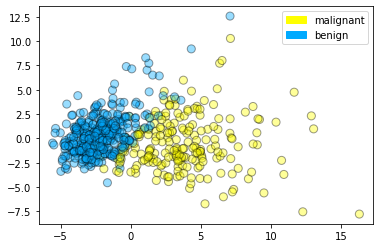

Text(0.5, 1.0, 'Breast cancer dataset PCA (n_components=2)')

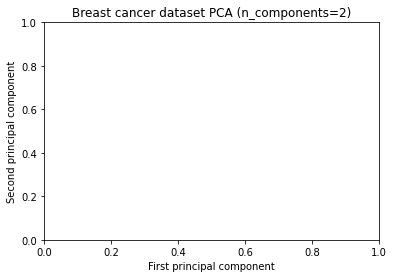

In [23]:
plot_labelled_scatter(X_pca, y_cancer, ["malignant", "benign"])

plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("Breast cancer dataset PCA (n_components=2)")

* There is a family of unsupervised algorithms called **manifold learning algorithms** that are very good at finding low dimensional structure in high dimensional data and are useful for visualization. 
> Multidimensional scaling (MDS) attempts to find a distance-preserving low-dimensional projection.

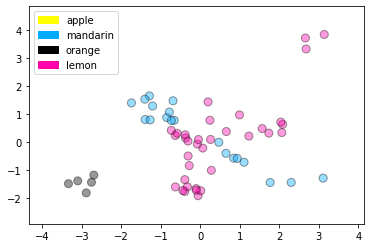

Text(0.5, 1.0, 'Fruit sample dataset MDS')

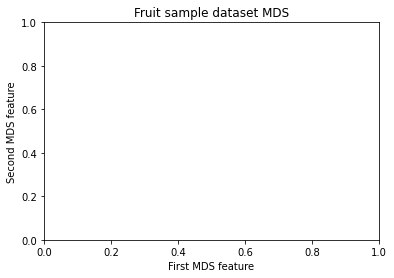

In [26]:
# Multidimensional scaling
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance

X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)

mds = MDS(n_components=2)
X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds, y_fruits, ["apple", "mandarin", "orange", "lemon"])
plt.xlabel("First MDS feature")
plt.ylabel("Second MDS feature")
plt.title("Fruit sample dataset MDS")

* Another especially powerful manifold learning algorithm for visualizing your data is called **t-SNE**.
> It finds two-dimensional representation of your data, such as the distance between points in the 2D scatterplot match as closely as possible the distances between the same points in the original high dimensional dataset.
 - t-SNE gives more weight to preserving information about distances between points that are neighbors.

 

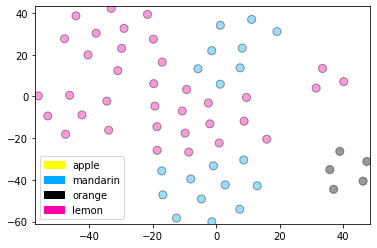

Text(0.5, 1.0, 'Fruits dataset t-SNE')

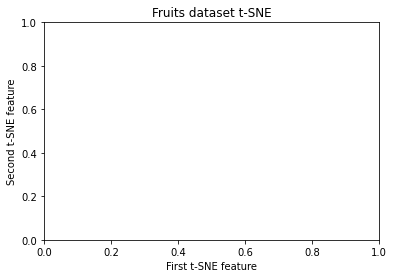

In [28]:
# t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(random_state=0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne, y_fruits, 
                      ["apple", "mandarin", "orange", "lemon"])
plt.xlabel("First t-SNE feature")
plt.ylabel("Second t-SNE feature")
plt.title("Fruits dataset t-SNE")

* t-SNE does a poor job of finding structure in this rather small and simple fruit dataset. It tends to work better on datasets that have more well-defined local structure (more clearly defined patterns of neighbors).

---

### Clustering

* Finding a way to divide a dataset into groups (clusters);

* Data points within the same cluster should be "close" or "similar" in some way;

* Clustering algorithms output a cluster membership index for each data point:
 - **Hard clustering**: each data point belongs to exactly one cluster;
 - **Soft (or fuzzy) clustering**: each data point is assigned a weight,score or probability of membership for each cluster.

#### K-means clustering

1. **initialization**: pick the number of clusters *k* you want to find, then pick *k* random points to serve as an initial guess for the cluster centers;

2. **step A**: assign each data point to the nearest cluster center;

3. **step B**: update each cluster center by replacing it with the mean of all points assigned to that cluster (in step A).

4. **repeat steps A and B** until the centers converge to a stable solution.

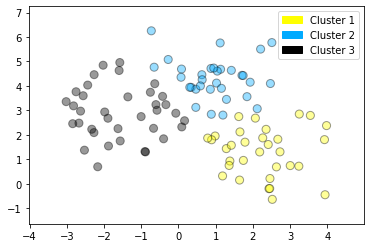

In [30]:
# k-means
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=0)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ["Cluster 1", "Cluster 2", "Cluster 3"])

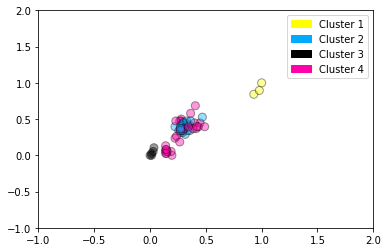

In [37]:
from sklearn.preprocessing import MinMaxScaler

X_fruits = fruits[['mass','width','height', 'color_score']].to_numpy()
y_fruits = fruits[['fruit_label']] - 1

X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_fruits_normalized)

plot_labelled_scatter(X_fruits_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

* If your data has features with different ranges, it's important to normalize using min-max scaling;

#### Limitations of k-means

* Works well for simple clusters that are same size, well-separated, globular shapes;

* Does not do well with irregular, complex clusters;

* Variants of k-means like k-medoids can work with categorical features;

#### Agglomerative clustering

* Work by doing an iterative bottom up approach;
 - Each data point is put into its own cluster of one item;
 - A sequence of clusterings are done where the most similar two clusters at each stage are merged into a new cluster;
 - This process is repeated until some stopping condition (number of clusters) is met.

* Linkage criteria for agglomerative clustering
 - **Ward's method**: Least increase in total variance (around cluster centroids);
 - **Average linkage**: Average distance between clusters;
 - **Complete linkage**: Max distance between clusters.


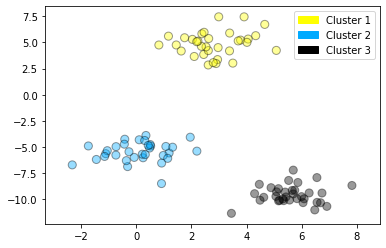

In [38]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=10)

cls = AgglomerativeClustering(n_clusters=3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment,
                      ["Cluster 1", "Cluster 2", "Cluster 3"])

#### Hierarchical clustering

* In agglomerative clustering it automatically arranges the data into a hierarchy as an effect of the algorithm, reflecting the order and cluster distance at which each data point is assigned to successive clusters;

* This hierarchy can be useful to visualize using what's called a **dendrogram**, which can be used even with higher dimensional data;





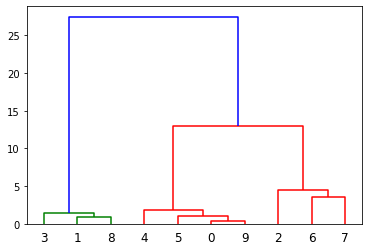

In [41]:
from scipy.cluster.hierarchy import ward, dendrogram

X, y = make_blobs(random_state=10, n_samples=10)
plt.figure()
dendrogram(ward(X))
plt.show()

* The `ward()` function return an linkage array that specifies the distances spanned during the agglomerative clustering;
> Used when the data follows some kind of hierarchical process so the tree is easily interpreted.

#### DBSCAN clustering

* Density-based spatial clustering of applications with noise (DBSCAN);

* Unlike k-means, you don't need to specify the number of clusters;

* Relatively efficient, can be used with large datasets (complex cluster shapes);

* Identifies likely noise points.
> Find outliers that shouldn't reasonably be assigned to any cluster.

* Clusters represent areas in the dataspace that are more dense with data points, while being spearated by regions that are empty or at least much less densely populated;

* Important parameters:
 - `min_samples`: Neighbor count parameter;
 - `eps`: Neighbor radius parameter

* All points that lie in a more dense region are called **core samples**;
> All core samples that are with a distance of eps units apart are put into the same cluster.

* Points that don't end up belonging to any cluster are considered as **noise**;


Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


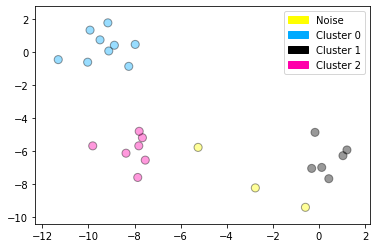

In [44]:
# DBSCAN
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=9, n_samples=25)

dbscan = DBSCAN(eps=2, min_samples=2)

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls+1, ["Noise", "Cluster 0", "Cluster 1", "Cluster 2"])

* The `eps` setting does implicitly control the number of clusters that are found.

* With DBSCAN, if you data is scaled by standard scalar or min-max scalar, finding an appropriate value for `eps` is a bit easer to do;

* Make sure that when you use the cluster assignments from DBSCAN, you check for and handle the -1 noise value appropriately. Since it may cause problems, if the cluster assignment is used as an index into another array later on.

#### Clustering evaluation

* With ground truth, existing labels can be used to evaluate cluster quality;

* Without ground trith, evaluation can be difficult: multiple clustering may be plausible for a dataset;

* Consider task-based evaluation: Evaluate clustering according to performance on a task that does have an objective basis for comparison;
> e.g. the effectiveness of clustering-based features for a supervised learning task.

* Some evaluation heuristics exist (e.g. silhouette) but these can be unreliable;

* Can be hard to automatically interpret or label the meaning of the clusters that are found, requiring human expertise to judge.

---

### How to Use t-SNE Effectively
Wattenberg, et al., "How to Use t-SNE Effectively", Distill, 2016. http://doi.org/10.23915/distill.00002

http://distill.pub/2016/misread-tsne/#citation

---

### How Machines Make Sense of Big Data: an Introduction to Clustering Algorithms
Gleesen, Peter. "How Machines Make Sense of Big Data: an Introduction to Clustering Algorithms", freeCodeCamp, 2017.

https://medium.freecodecamp.com/how-machines-make-sense-of-big-data-an-introduction-to-clustering-algorithms-4bd97d4fbaba

